In [1]:
import pandas as pd
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# train_test_split

In [2]:
from sklearn.model_selection import train_test_split

y = df['Outcome'] #Storing the outcome column
X = df.drop(columns='Outcome') #Droping the outcome column
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=31)

# Logistic Regression Model

In [3]:
from sklearn.linear_model import LogisticRegression

# Instantiating the model
log_reg = LogisticRegression()

# Training the model on the train data
log_reg.fit(X_train,y_train)

#Predict on the test data
y_pred = log_reg.predict(X_test)

outcome_df =  pd.DataFrame({'Actuals':y_test,'Predictions':y_pred})

outcome_df

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,Actuals,Predictions
55,0,0
87,0,0
752,0,0
202,0,0
378,1,1
160,0,0
639,0,0
646,1,0
591,0,0
119,0,0


# Confusion Matrix

In [10]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score,roc_curve,f1_score

#Generate Confusion Matrix
#Inputs Actuals and Predicitons
confusion_matrix = confusion_matrix(y_test,y_pred)
confusion_matrix

array([[83, 15],
       [25, 31]], dtype=int64)

In [11]:
print("Accuracy:", accuracy_score(y_test,y_pred))
print("Precision:", precision_score(y_test,y_pred))
print("Recall:", recall_score(y_test,y_pred))
print("F-1Score:", f1_score(y_test,y_pred))

Accuracy: 0.7402597402597403
Precision: 0.6739130434782609
Recall: 0.5535714285714286
F-1Score: 0.6078431372549019


# ROC Curve
- We are giving the probabilities of the of the predictors as the input rather than the predictors themselves because the predictors are predicted based on the default thresold value.
- But ROC curve is plotted for different predictors for different thresolds
- So we go one step back in the model i.e, back to __y_pred probabilites__
- The ROC curve function automatically finds different predictors for different thresolds

In [17]:
y_pred_proba = log_reg.predict_proba(X_test)
y_pred_proba

array([[0.94457408, 0.05542592],
       [0.78174254, 0.21825746],
       [0.83220291, 0.16779709],
       [0.82981836, 0.17018164],
       [0.32302992, 0.67697008],
       [0.60263531, 0.39736469],
       [0.9391304 , 0.0608696 ],
       [0.59862986, 0.40137014],
       [0.74178012, 0.25821988],
       [0.89852706, 0.10147294],
       [0.76747922, 0.23252078],
       [0.14159809, 0.85840191],
       [0.71105222, 0.28894778],
       [0.82922788, 0.17077212],
       [0.6641168 , 0.3358832 ],
       [0.65931637, 0.34068363],
       [0.87629087, 0.12370913],
       [0.9926942 , 0.0073058 ],
       [0.3731333 , 0.6268667 ],
       [0.87787108, 0.12212892],
       [0.59976756, 0.40023244],
       [0.39211102, 0.60788898],
       [0.24106179, 0.75893821],
       [0.92038767, 0.07961233],
       [0.85433424, 0.14566576],
       [0.69595761, 0.30404239],
       [0.38143067, 0.61856933],
       [0.1233478 , 0.8766522 ],
       [0.49989662, 0.50010338],
       [0.25538448, 0.74461552],
       [0.

##### The output of Y_pred_proba is array with Probability(0,1)
##### Our Area of interest is 1's so we need to slice only 1's

In [18]:
y_pred_proba = y_pred_proba[::,1]
y_pred_proba

array([0.05542592, 0.21825746, 0.16779709, 0.17018164, 0.67697008,
       0.39736469, 0.0608696 , 0.40137014, 0.25821988, 0.10147294,
       0.23252078, 0.85840191, 0.28894778, 0.17077212, 0.3358832 ,
       0.34068363, 0.12370913, 0.0073058 , 0.6268667 , 0.12212892,
       0.40023244, 0.60788898, 0.75893821, 0.07961233, 0.14566576,
       0.30404239, 0.61856933, 0.8766522 , 0.50010338, 0.74461552,
       0.45257885, 0.27378114, 0.09364775, 0.4503906 , 0.15703093,
       0.11144299, 0.25472939, 0.80883954, 0.2708687 , 0.12286757,
       0.45884898, 0.16266933, 0.29644074, 0.62793779, 0.1865446 ,
       0.54323529, 0.28318131, 0.12845208, 0.77735186, 0.74100449,
       0.89103514, 0.22729593, 0.7504888 , 0.54587964, 0.4382474 ,
       0.1086391 , 0.69219999, 0.19740885, 0.27673236, 0.49301326,
       0.11588152, 0.69737931, 0.33789064, 0.41144328, 0.34094259,
       0.34399331, 0.44613171, 0.26375246, 0.47929515, 0.08845007,
       0.53140788, 0.32744471, 0.10592489, 0.34612128, 0.55051

In [21]:
# Building the ROC Curve

fpr,tpr,thresold = roc_curve(y_test,y_pred_proba) #Get the fpr, tpr  for different thresolds 

auc = roc_auc_score(y_test,y_pred_proba) # Gives the area under the curve

print("FPR:",fpr)
print('\n')
print("TPR:",tpr)
print('\n')
print("Thresold:",thresold)
print('\n')
print("AUC:",auc)

FPR: [0.         0.01020408 0.02040816 0.02040816 0.03061224 0.03061224
 0.04081633 0.04081633 0.05102041 0.05102041 0.06122449 0.06122449
 0.07142857 0.07142857 0.09183673 0.09183673 0.10204082 0.10204082
 0.1122449  0.1122449  0.14285714 0.14285714 0.15306122 0.15306122
 0.16326531 0.16326531 0.17346939 0.17346939 0.18367347 0.18367347
 0.20408163 0.20408163 0.21428571 0.21428571 0.23469388 0.23469388
 0.24489796 0.24489796 0.28571429 0.28571429 0.32653061 0.32653061
 0.42857143 0.42857143 0.46938776 0.46938776 0.47959184 0.47959184
 0.73469388 0.73469388 0.76530612 0.76530612 0.83673469 0.83673469
 0.95918367 0.95918367 1.        ]


TPR: [0.         0.         0.         0.01785714 0.01785714 0.21428571
 0.21428571 0.23214286 0.23214286 0.28571429 0.28571429 0.30357143
 0.30357143 0.44642857 0.44642857 0.48214286 0.48214286 0.5
 0.5        0.51785714 0.51785714 0.53571429 0.53571429 0.55357143
 0.55357143 0.60714286 0.60714286 0.625      0.625      0.64285714
 0.64285714 0.69642857

#### You can observe the FPRs decreasing as the Thresold in Increasing

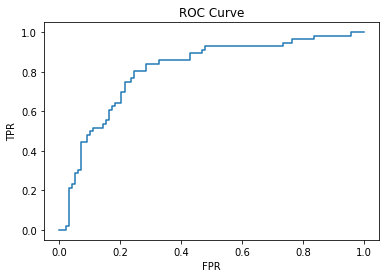

In [22]:
from matplotlib import pyplot as plt 

plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")

plt.show()